### Challenge: Mitigate Energy Consumption and climate change.

Climate change is an issue that is heavily impacted by energy policy and infrastructure. In
general, greenhouse gas (GHG) emissions mitigation needs changes to electrical systems,
transportation, buildings, industry, and land use.
Here, using our Dataset, we want to understand which variable has the highest effect on the Site
Energy Usage Intensity variable: the amount of heat and electricity consumed by a building as
reflected in utility bills.
However, our data should first go through preprocessing before creating a model.

| Column Name                            | Description                                                     | Cat/Num | Disc/Cont  | Unique vals | Null Vals |
|----------------------------------------|-----------------------------------------------------------------|---------|------------|-------------|-----------|
| building_class                         | building classification                                         | Cat     | Nominal    | 2           | 0         |
| floor_area                             | floor area (in square feet) of the building                     | Num     | Continuous | 20433       | 0         |
| year_built                             | year in which the building was constructed                      | Num     | Discrete   | 180         | 1837      |
| precipitation_inches                   | annual precipitation in inches at the location of the building  | Num     | Continuous | 171         | 0         |
| snowfall_inches                        | annual snowfall in inches at the location of the building       | Num     | Continuous | 71          | 0         |
| avg_temp                               | average temperature over a year at the location of the building | Num     | Continuous | 173         | 0         |
| days_with_fog                          | number of days with fog at the location of the building         | Num     | Discrete   | 42          | 45796     |
| Site_eui Site Energy Usage Intensity:  | amount of heat and electricity consumed by a building           | Num     | Continuous | 17203       | 0         |
|                                        |                                                                 |         |            |             |           |

## 1. Data Insight and Data Understanding

###  <span style="color:blue">Homework: 1. Please take a look at the data types</span>.

### Assess maximum and minimum values for each numeric column

In [69]:
set(df['building_class'].tolist())

{'Commercial', 'Residential'}

In [3]:
filename='ClimateData.csv'

import pandas as pd
df = pd.read_csv (filename, index_col=0)
#print(df)
print("Maximum values:\n",'-'*40)
print(df.max(numeric_only=True)) 
print("Minimum values:\n",'-'*40)
print(df.min(numeric_only=True)) 


Maximum values:
 ----------------------------------------
floor_area              6.385382e+06
year_built              2.015000e+03
precipitation_inches    1.076900e+02
snowfall_inches         1.273000e+02
avg_temp                7.724521e+01
days_with_fog           3.110000e+02
site_eui                9.978700e+02
dtype: float64
Minimum values:
 ----------------------------------------
floor_area              943.000000
year_built                0.000000
precipitation_inches      0.000000
snowfall_inches           0.000000
avg_temp                 44.512329
days_with_fog            12.000000
site_eui                  1.000000
dtype: float64


### Determine total number of rows in the dataset

In [4]:
print("Number of data rows: {}".format(len(df)))

Number of data rows: 75757



###  <span style="color:blue">Homework 2. Summarize the number of unique values in each column.</span>.

### Determine number of unique values in each column

In [5]:
df.nunique()

building_class              2
floor_area              20433
year_built                180
precipitation_inches      171
snowfall_inches            71
avg_temp                  173
days_with_fog              42
site_eui                17203
dtype: int64

###  <span style="color:blue">Homework 4. Check the number of missing values.</span>


### Determine how many null values exist in each column. Later determine what to do about each circumstance where a null value occurs.

In [6]:
df.isnull().sum(axis=0)

building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

### Determine how many zero values exist in each column. This is sometimes important as missing values in the raw data may have been plugged with zeros. In this dataset, for instance, if year built equals zero, it likely is not indicative of a structure built 2000 years ago, so therefore should be treated like a null value that needs to be corrected.  However, variables like precipitation could be zero for a structure in a desert/arid environment or snowfall could be zero in more tropical zones.

In [9]:
df.isin([0]).sum(axis=0)  

building_class             0
floor_area                 0
year_built                 6
precipitation_inches       2
snowfall_inches         8726
avg_temp                   0
days_with_fog              0
site_eui                   0
dtype: int64

Check the quantity of each categorical value

In [64]:
df["building_class"].isin(['Commercial']).sum(axis=0)  

32199

In [65]:
df["building_class"].isin(['Residential']).sum(axis=0)  

43558

#### As I expected, after seeing the year_built histogram (below), there are some zero values in the year built column.

### Visually inspect the top of the dataset, then check whether the bottom (generally) matches. If the dataset looks very different then inspect further.

In [36]:
df.head()

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,
0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


### Determine total number of rows in the dataset

In [6]:
df.tail()

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,
75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02
75756,Residential,23888.0,1974.0,107.69,28.8,49.127397,NaN,29.15


#### In this case, the head and tail seem consistent so will assume the overall dataset looks mostly like this. 

###  <span style="color:blue"> Homework 3. Check at descriptive statistics for the Dataset.</span>

### Create histograms and boxplots for each column to help understand how the data is distributed. This will later help determine how NaN's should be treated and whether columns should be normalized.


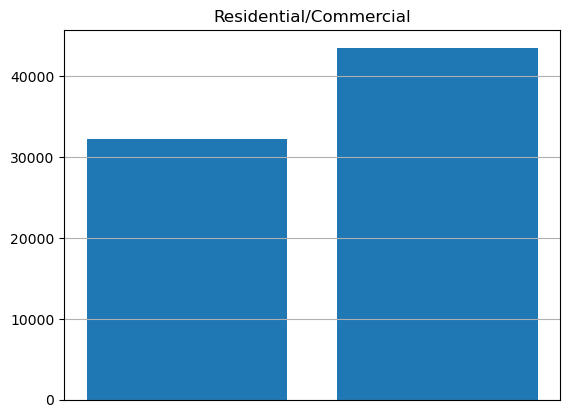

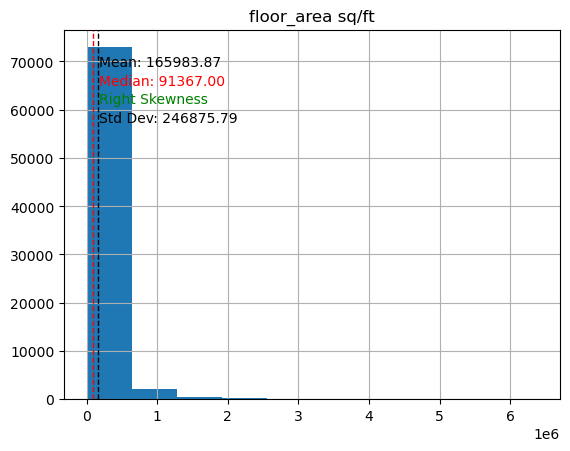

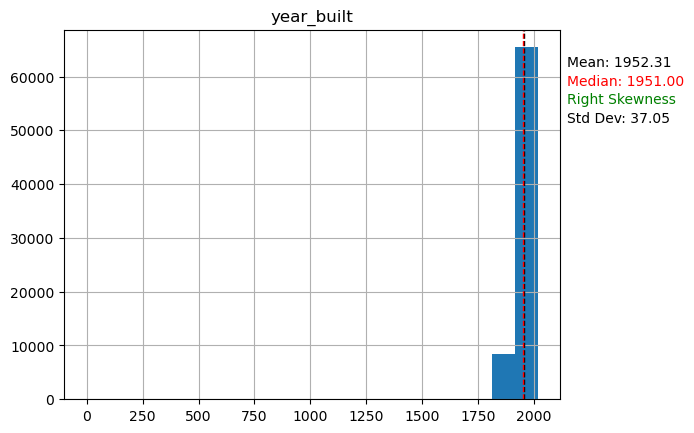

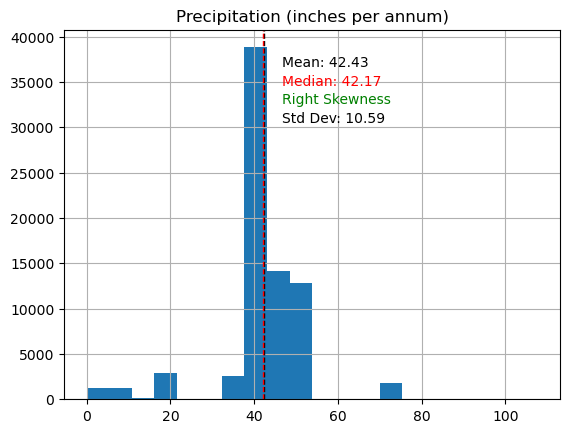

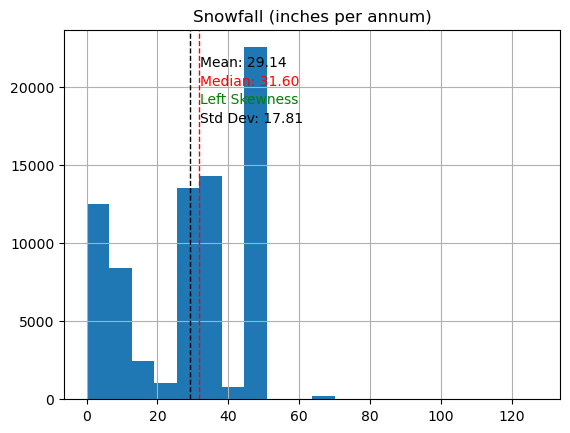

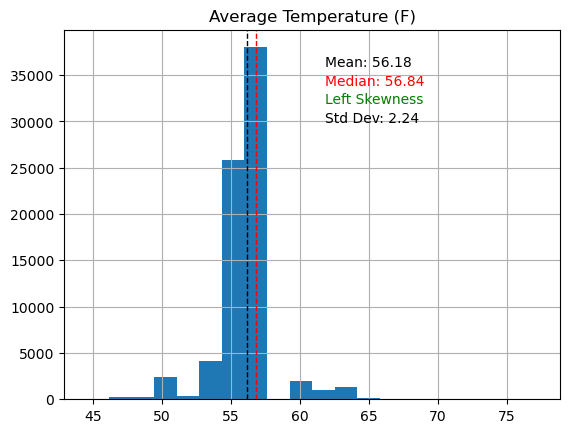

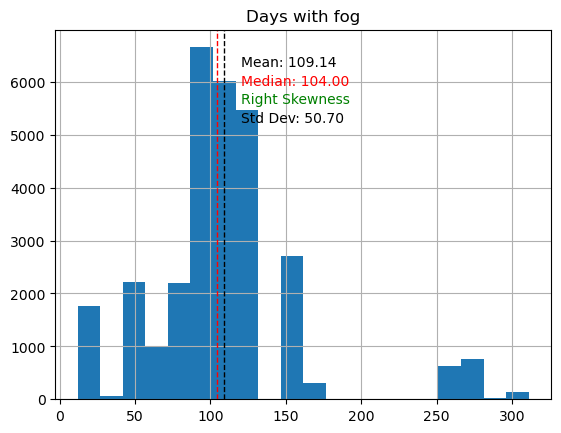

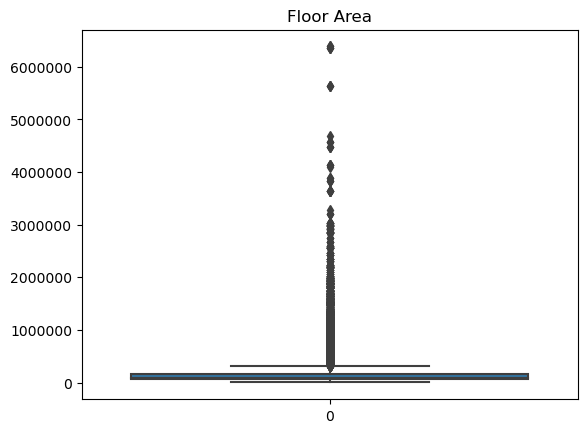

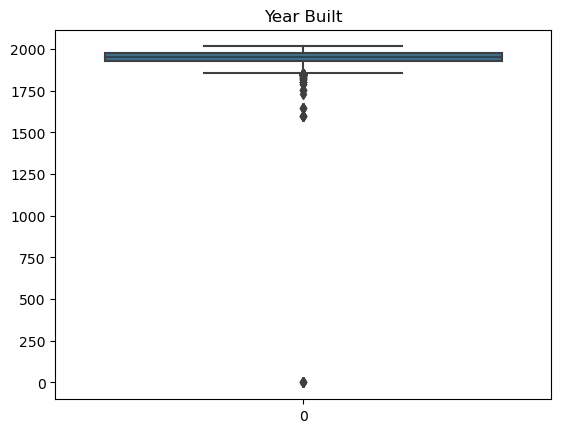

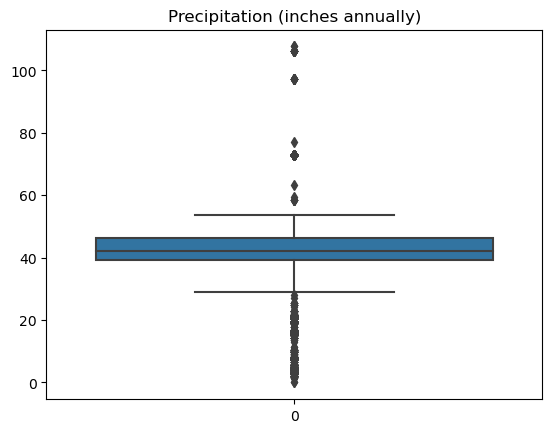

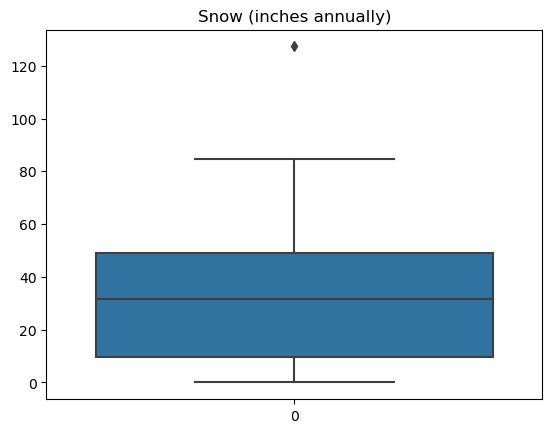

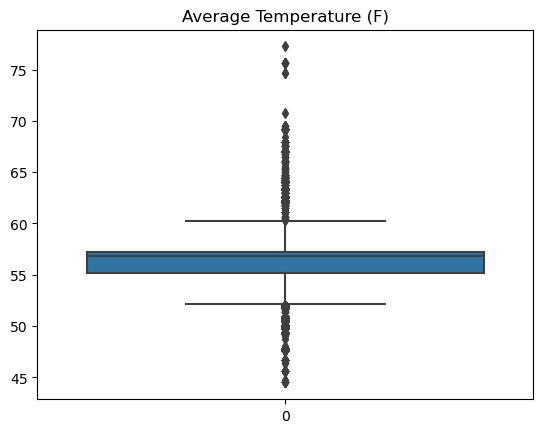

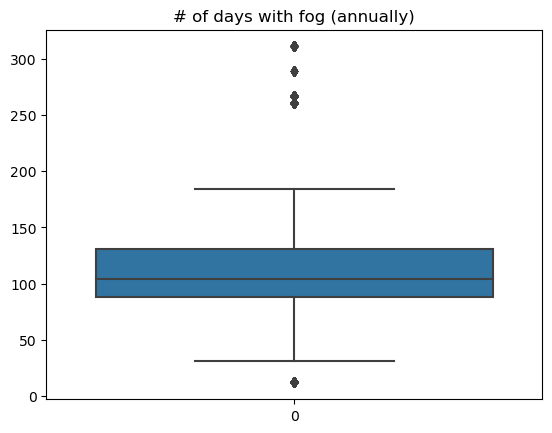

In [22]:
# import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Seaborn visualization library
import seaborn as sns# Create the default pairplot

bc=df["building_class"]
bc.hist(bins=2,rwidth=0.8,align='mid')
plt.title('Residential/Commercial')

plt.show()

fa=df["floor_area"]
fa.hist(bins=10)
plt.axvline(fa.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fa.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fa.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(fa.mean()))

plt.text(fa.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(fa.median()),color='r')
if fa.mean()== fa.median():
    plt.text(fa.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if fa.mean()>= fa.median():
    plt.text(fa.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if fa.mean()<= fa.median():
    plt.text(fa.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(fa.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(fa.std()))    

# Set x-axis label
plt.title('floor_area sq/ft')
plt.show()

yb=df["year_built"]
yb.hist(bins=20)
plt.axvline(yb.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(yb.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(yb.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(yb.mean()))

plt.text(yb.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(yb.median()),color='r')
if yb.mean()== yb.median():
    plt.text(yb.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if yb.mean()>= yb.median():
    plt.text(yb.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if yb.mean()<= yb.median():
    plt.text(yb.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(yb.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(yb.std()))    

# Set x-axis label
plt.title('year_built')
plt.show()

precip=df["precipitation_inches"]
precip.hist(bins=20)
plt.axvline(precip.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(precip.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(precip.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(precip.mean()))

plt.text(precip.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(precip.median()),color='r')
if precip.mean()== precip.median():
    plt.text(precip.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if precip.mean()>= precip.median():
    plt.text(precip.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if precip.mean()<= precip.median():
    plt.text(precip.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(precip.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(precip.std()))    

# Set x-axis label
plt.title('Precipitation (inches per annum)')
plt.show()

snow=df["snowfall_inches"]
snow.hist(bins=20)
plt.axvline(snow.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(snow.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(snow.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(snow.mean()))

plt.text(snow.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(snow.median()),color='r')
if snow.mean()== snow.median():
    plt.text(snow.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if snow.mean()>= snow.median():
    plt.text(snow.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if snow.mean()<= snow.median():
    plt.text(snow.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(snow.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(snow.std()))    

# Set x-axis label
plt.title('Snowfall (inches per annum)')
plt.show()

temp=df["avg_temp"]
temp.hist(bins=20)
plt.axvline(temp.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(temp.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(temp.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(temp.mean()))

plt.text(temp.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(temp.median()),color='r')
if temp.mean()== temp.median():
    plt.text(temp.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if temp.mean()>= temp.median():
    plt.text(temp.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if temp.mean()<= temp.median():
    plt.text(temp.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(temp.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(temp.std()))    

# Set x-axis label
plt.title('Average Temperature (F)')
plt.show()

fog=df["days_with_fog"]
fog.hist(bins=20)
plt.axvline(fog.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fog.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fog.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(fog.mean()))

plt.text(fog.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(fog.median()),color='r')
if fog.mean()== fog.median():
    plt.text(fog.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if fog.mean()>= fog.median():
    plt.text(fog.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if fog.mean()<= fog.median():
    plt.text(fog.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(fog.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(fog.std()))    

# Set x-axis label
plt.title('Days with fog')
plt.show()

#df.boxplot()
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=fa).set_title('Floor Area')
plt.show()
#ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=yb).set_title('Year Built')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=precip).set_title('Precipitation (inches annually)')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=snow).set_title('Snow (inches annually)')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=temp).set_title('Average Temperature (F)')
plt.show()


plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=fog).set_title('# of days with fog (annually)')
plt.show()


### Visually compare columns pairwise to look for highly correlated independent variables. These would show as the dots coalescing around a line with positive slope or conversely, a negatively sloped line for inversely related variables.  

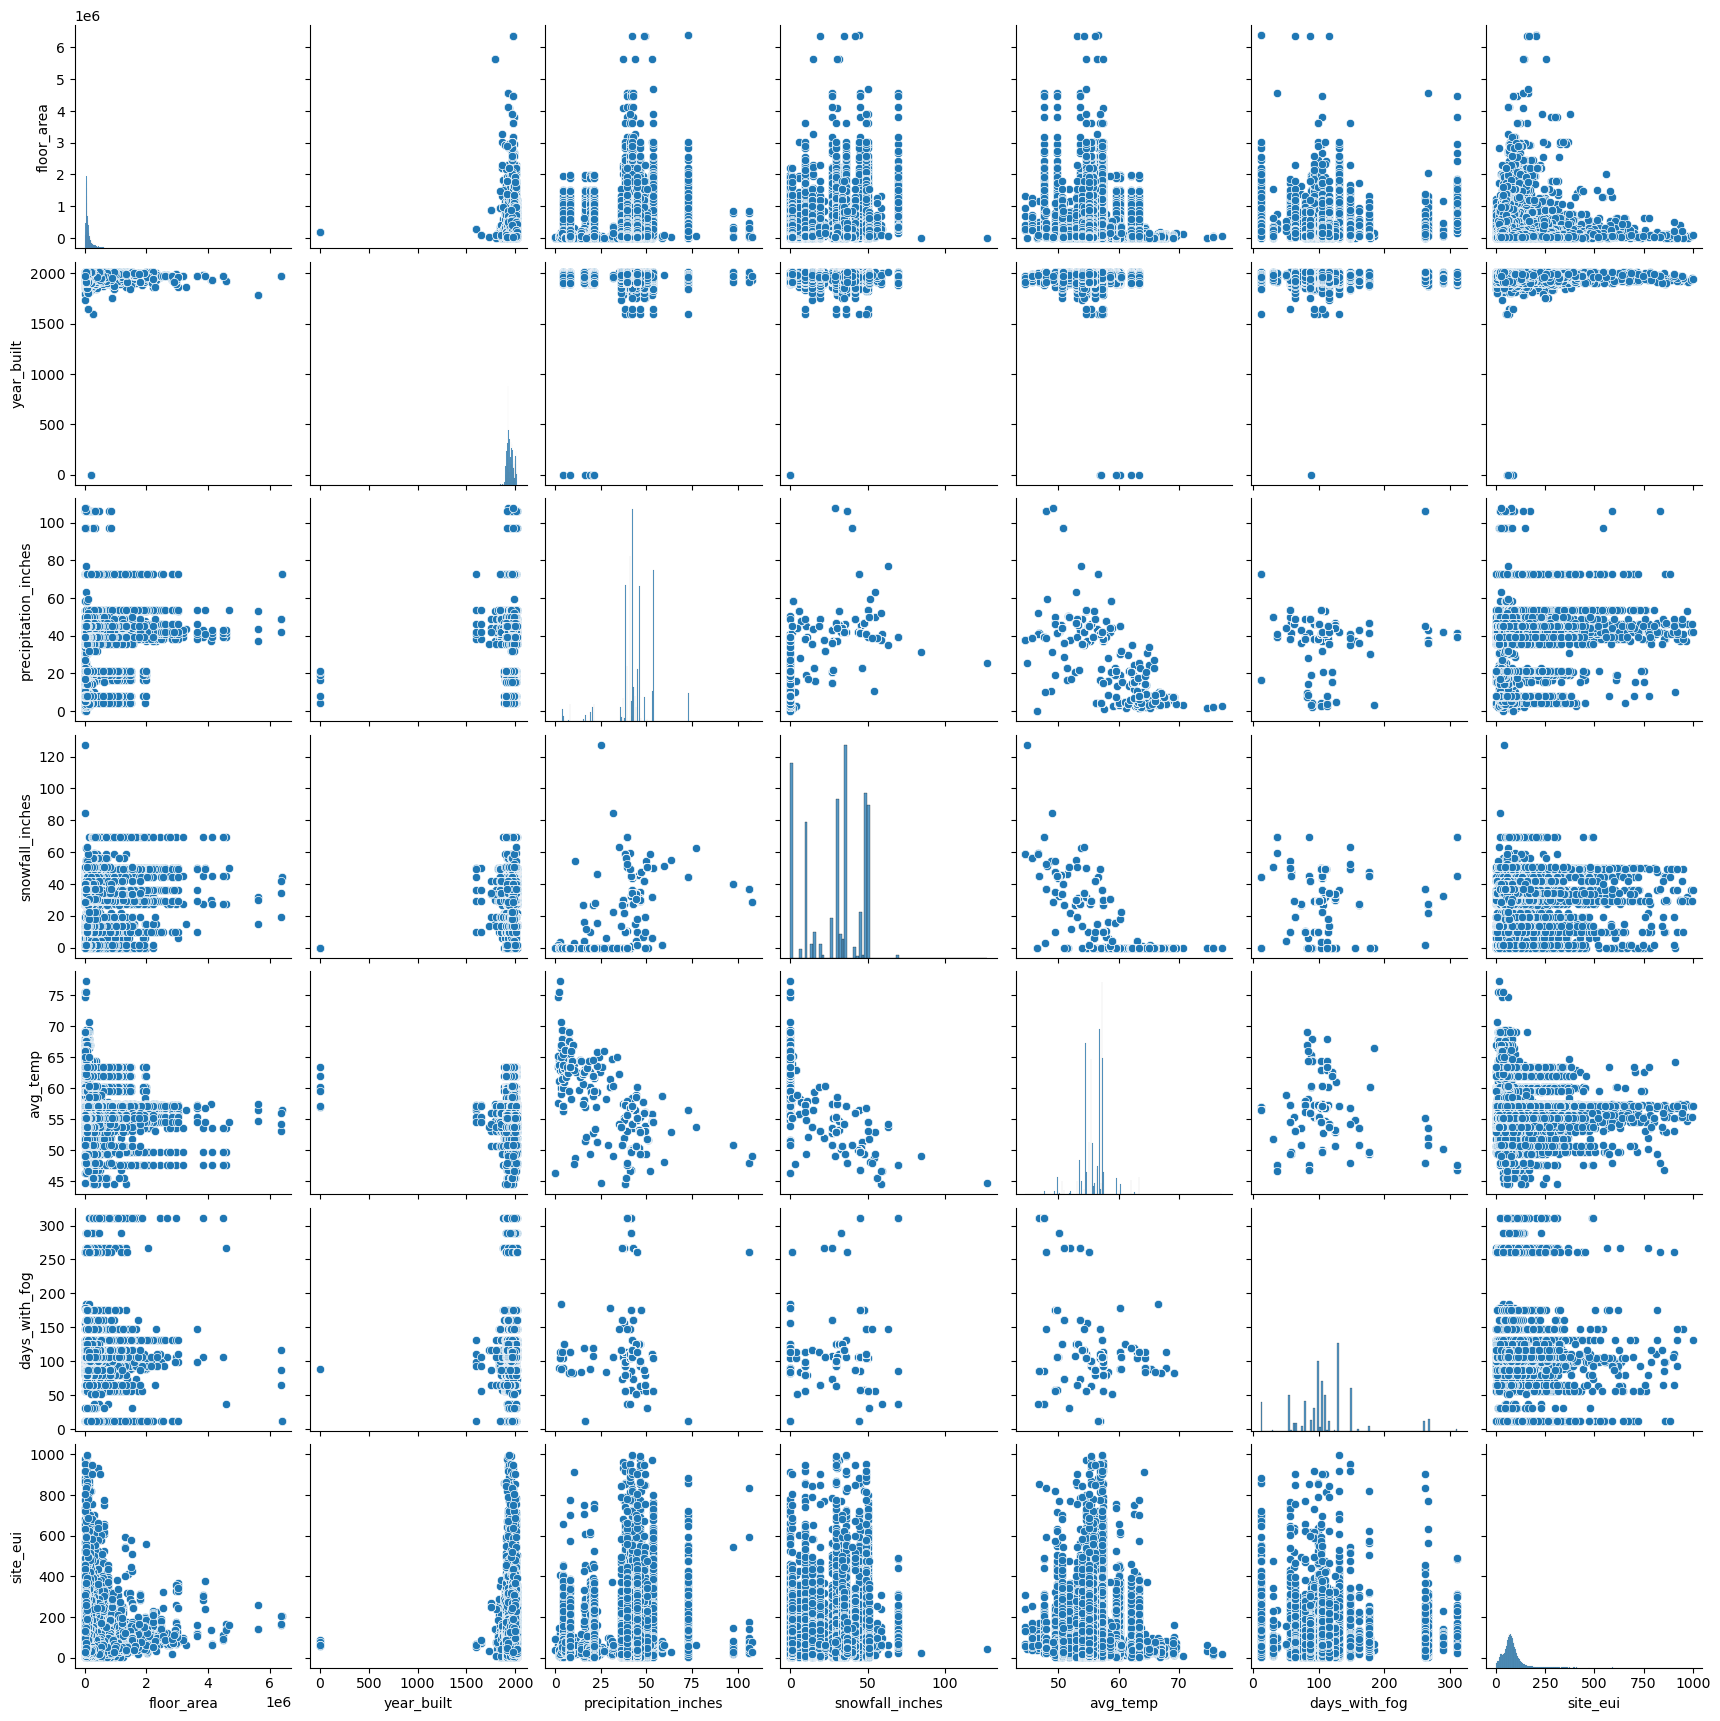

In [23]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(df)

### Compare the correlation of independent variables using a table. Highly correlated variables would have a value between approximately .75 and 1.0. Highly inversely correlated variables would have a value between approximately -.75 and -1.0.

In [24]:
#find the correlation among the columns using pearson 
df.corr(method ='pearson')

,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
floor_area,1.000000,0.100878,0.062634,0.092503,-0.111303,0.014282,0.073967
year_built,0.100878,1.000000,0.051926,-0.049473,-0.112555,0.084167,0.017163
precipitation_inches,0.062634,0.051926,1.000000,0.561841,-0.574878,-0.416928,0.113558
snowfall_inches,0.092503,-0.049473,0.561841,1.000000,-0.362738,-0.005607,0.157284
avg_temp,-0.111303,-0.112555,-0.574878,-0.362738,1.000000,-0.246672,-0.089201
days_with_fog,0.014282,0.084167,-0.416928,-0.005607,-0.246672,1.000000,-0.055388
site_eui,0.073967,0.017163,0.113558,0.157284,-0.089201,-0.055388,1.000000


###  <span style="color:blue"> Homework #5. Take care of missing data. You can decide to remove or use the imputation.</span>

As previously shown above, missing data needs to be replaced for the independent variables year_built and days_with_fog since they each contain null values. Additionally, year_built values of zero should be replaced. 



In [26]:
df.isnull().sum(axis=0)

building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

In [30]:
print( "Year built median:{} \nYear built mean:{}".format(yb.median(),yb.mean()) )

Year built median:1951.0 
Year built mean:1952.306764069264


Since the mean and median are close and the boxplot shows most values in a very tight range (small std dev), it appears reasonable to replace null values and zero values with the median.


In [31]:
df['year_built'] = df['year_built'].fillna(yb.median())

In [32]:
#Validate year_built and days_with_fog no longer have null values
df.isnull().sum(axis=0)

building_class              0
floor_area                  0
year_built                  0
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

...and change year_built zero values with the median

In [33]:
df['year_built'].isin([0]).sum(axis=0)  

6

Now replace the year_built zero values with the median.

In [34]:
df['year_built'].replace(0,yb.median(),inplace=True)
df['year_built'].isin([0]).sum(axis=0) 

0

Now plug the NaN values for days_with_fog

In [35]:
print( "days_with_fog median:{} \ndays_with_fog mean:{}".format(fog.median(),fog.mean()) )

days_with_fog median:104.0 
days_with_fog mean:109.14205133340009


Since the boxplot shows most days_with_fog values in a relatively small range (small std dev), it appears reasonable to replace null values with the median.


In [36]:
df['days_with_fog'] = df['days_with_fog'].fillna(fog.median())

In [37]:
#Validate days_with_fog no longer have null values
df['days_with_fog'].isnull().sum(axis=0)

0

###  <span style="color:blue"> Homework #6. Find and remove duplicate variables.</span>

There are no duplicate variables. Duplicates would be indicated by a strong (>.75) correlation when compared pairwise. (Pairwise plot shown above)

###  <span style="color:blue"> Homework #7. Encode the categorical variables; you can use label encoding, one hot encoding, or...</span>

building_class is the only categorical variable in this dataset. Replace this using one-hot encoding.

In [44]:
bldg_class=pd.get_dummies(df['building_class'],prefix_sep='_',prefix='bldgClass',drop_first = False)
bldg_class

,bldgClass_Commercial,bldgClass_Residential
id,,
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
75752,1,0
75753,0,1
75754,1,0


In [49]:
#Now merge these new columns onto the original dataframe 
df2=pd.concat([bldg_class,df],axis=1)
df2

,bldgClass_Commercial,bldgClass_Residential,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,,,
0,1,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,0,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,1,0,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,1,0,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,1,0,Commercial,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90
...,...,...,...,...,...,...,...,...,...,...
75752,1,0,Commercial,20410.0,1995.0,45.03,1.4,55.147541,104.0,132.92
75753,0,1,Residential,40489.0,1910.0,45.03,1.4,55.147541,104.0,39.48
75754,1,0,Commercial,28072.0,1917.0,106.32,36.6,47.911202,104.0,48.40


In [50]:
#Now drop the original building class column
df2.drop('building_class',axis=1,inplace=True)
df2.head(10)

,bldgClass_Commercial,bldgClass_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,,
0,1,0,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,0,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,1,0,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,1,0,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,1,0,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90
5,1,0,119900.0,1956.0,16.59,0.0,56.972603,104.0,6.60
6,1,0,91367.0,1982.0,16.59,0.0,56.972603,104.0,12.82
7,1,0,50422.0,1947.0,16.59,0.0,56.972603,104.0,22.39
8,1,0,122020.0,1929.0,16.59,0.0,56.972603,104.0,28.20


In [51]:
df2.tail()

,bldgClass_Commercial,bldgClass_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,,
75752,1,0,20410.0,1995.0,45.03,1.4,55.147541,104.0,132.92
75753,0,1,40489.0,1910.0,45.03,1.4,55.147541,104.0,39.48
75754,1,0,28072.0,1917.0,106.32,36.6,47.911202,104.0,48.40
75755,1,0,53575.0,2012.0,106.32,36.6,47.911202,104.0,592.02
75756,0,1,23888.0,1974.0,107.69,28.8,49.127397,104.0,29.15



###  <span style="color:blue"> Homework #8. Create the boxplot and show the outlier.</span>

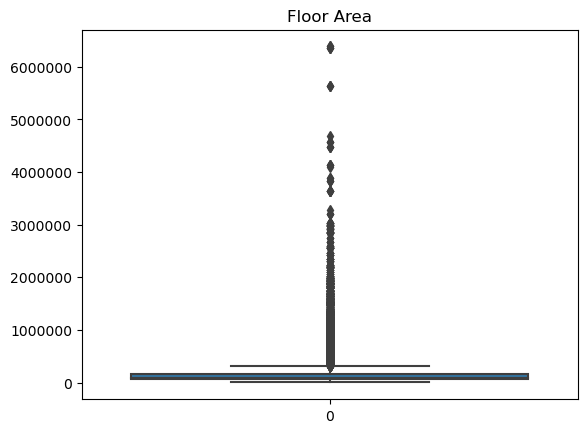

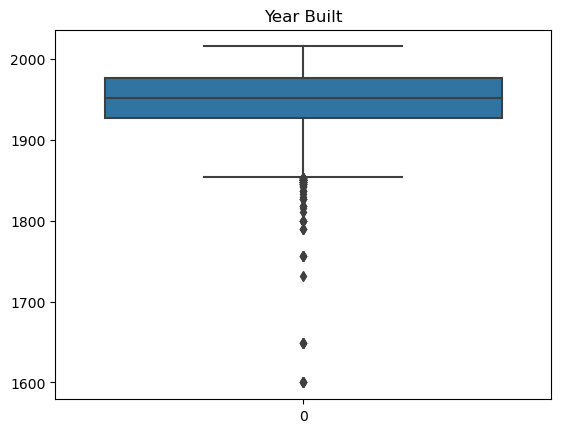

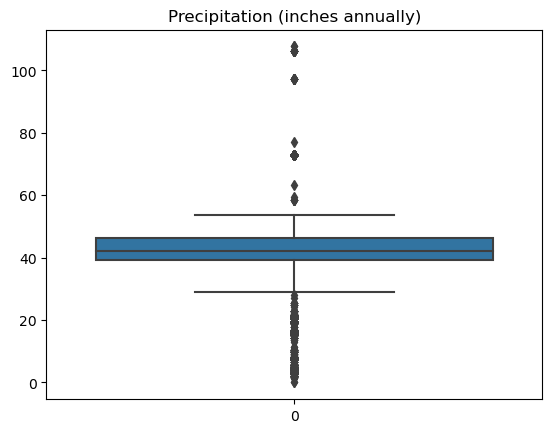

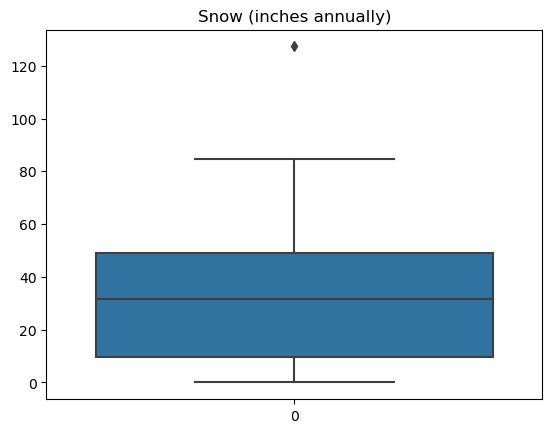

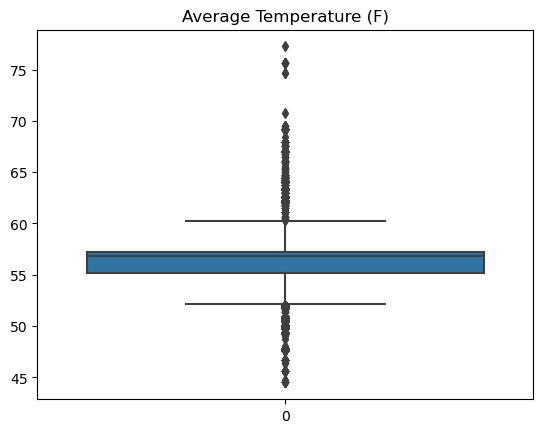

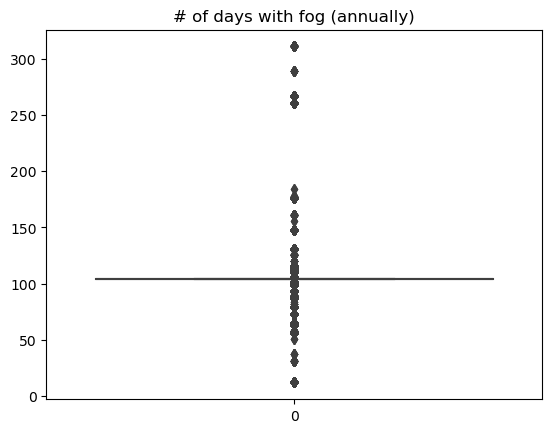

In [52]:
fa2=df2["floor_area"]
yb2=df2["year_built"]
precip2=df2["precipitation_inches"]
snow2=df2["snowfall_inches"]
temp2=df2["avg_temp"]
fog2=df2["days_with_fog"]

#df.boxplot()
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=fa2).set_title('Floor Area')
plt.show()
#ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=yb2).set_title('Year Built')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=precip2).set_title('Precipitation (inches annually)')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=snow2).set_title('Snow (inches annually)')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=temp2).set_title('Average Temperature (F)')
plt.show()


plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=fog2).set_title('# of days with fog (annually)')
plt.show()


###  <span style="color:blue"> Homework #9. Create the histogram and check the outliers.</span>

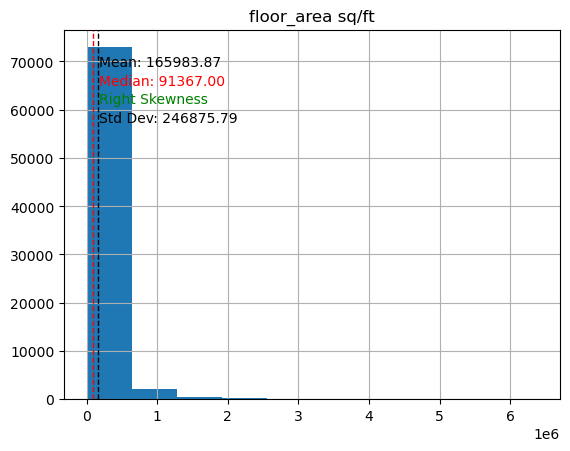

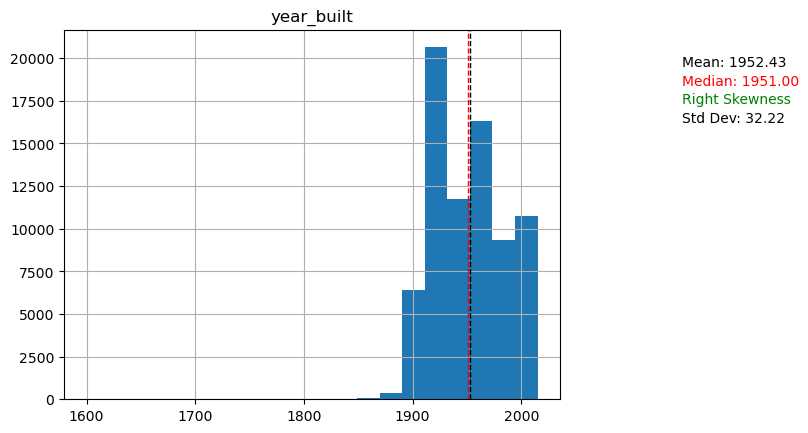

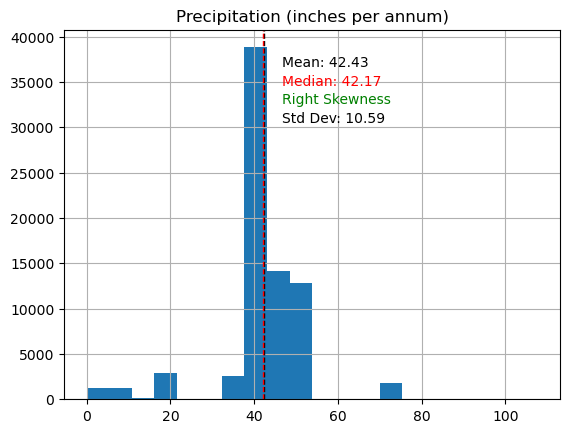

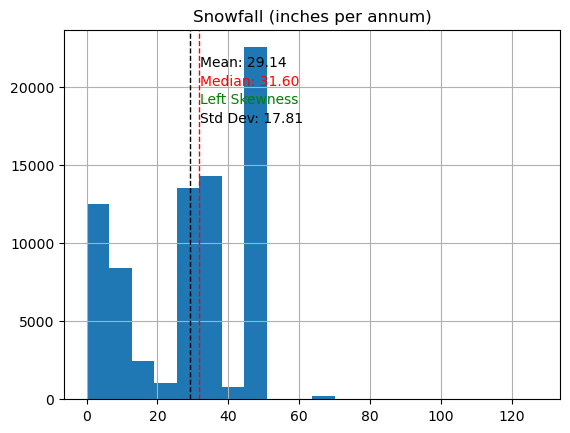

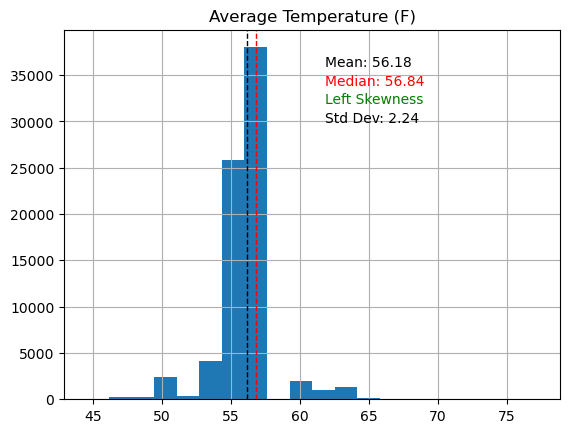

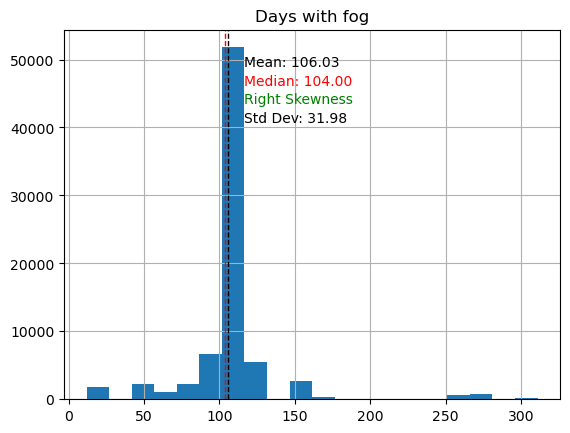

In [59]:


fa2=df2["floor_area"]
fa2.hist(bins=10)
plt.axvline(fa2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fa2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fa2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(fa2.mean()))

plt.text(fa2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(fa2.median()),color='r')
if fa2.mean()== fa2.median():
    plt.text(fa2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if fa2.mean()>= fa2.median():
    plt.text(fa2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if fa2.mean()<= fa2.median():
    plt.text(fa2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(fa2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(fa2.std()))    

# Set x-axis label
plt.title('floor_area sq/ft')
plt.show()

yb2=df2["year_built"]
yb2.hist(bins=20)
plt.axvline(yb2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(yb2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(yb2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(yb2.mean()))

plt.text(yb2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(yb2.median()),color='r')
if yb2.mean()== yb2.median():
    plt.text(yb2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if yb2.mean()>= yb2.median():
    plt.text(yb2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if yb2.mean()<= yb2.median():
    plt.text(yb2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(yb2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(yb2.std()))    

# Set x-axis label
plt.title('year_built')
plt.show()

precip2=df2["precipitation_inches"]
precip2.hist(bins=20)
plt.axvline(precip2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(precip2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(precip2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(precip2.mean()))

plt.text(precip2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(precip2.median()),color='r')
if precip2.mean()== precip2.median():
    plt.text(precip2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if precip2.mean()>= precip2.median():
    plt.text(precip2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if precip2.mean()<= precip2.median():
    plt.text(precip2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(precip2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(precip2.std()))    

# Set x-axis label
plt.title('Precipitation (inches per annum)')
plt.show()

snow2=df2["snowfall_inches"]
snow2.hist(bins=20)
plt.axvline(snow2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(snow2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(snow2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(snow2.mean()))

plt.text(snow2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(snow2.median()),color='r')
if snow2.mean()== snow2.median():
    plt.text(snow2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if snow2.mean()>= snow2.median():
    plt.text(snow2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if snow2.mean()<= snow2.median():
    plt.text(snow2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(snow2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(snow2.std()))    

# Set x-axis label
plt.title('Snowfall (inches per annum)')
plt.show()

temp2=df2["avg_temp"]
temp2.hist(bins=20)
plt.axvline(temp2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(temp2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(temp2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(temp2.mean()))

plt.text(temp2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(temp2.median()),color='r')
if temp2.mean()== temp2.median():
    plt.text(temp2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if temp2.mean()>= temp2.median():
    plt.text(temp2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if temp2.mean()<= temp2.median():
    plt.text(temp2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(temp2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(temp2.std()))    

# Set x-axis label
plt.title('Average Temperature (F)')
plt.show()

fog2=df2["days_with_fog"]
fog2.hist(bins=20)
plt.axvline(fog2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fog2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fog2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(fog2.mean()))

plt.text(fog2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(fog2.median()),color='r')
if fog2.mean()== fog2.median():
    plt.text(fog2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if fog2.mean()>= fog2.median():
    plt.text(fog2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if fog2.mean()<= fog2.median():
    plt.text(fog2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(fog2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(fog2.std()))    

# Set x-axis label
plt.title('Days with fog')
plt.show()


###  <span style="color:blue"> Homework #10. If feature scaling is needed, do it, please.</span>

In [55]:
df2.head(20)

,bldgClass_Commercial,bldgClass_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,,
0,1,0,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,0,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,1,0,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,1,0,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,1,0,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90
5,1,0,119900.0,1956.0,16.59,0.0,56.972603,104.0,6.60
6,1,0,91367.0,1982.0,16.59,0.0,56.972603,104.0,12.82
7,1,0,50422.0,1947.0,16.59,0.0,56.972603,104.0,22.39
8,1,0,122020.0,1929.0,16.59,0.0,56.972603,104.0,28.20


In [58]:
# copy the data
df_z_scaled = df2.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    if column=='bldgClass_Commercial' or column=='bldgClass_Residential'or column=='site_eui':
        continue
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,bldgClass_Commercial,bldgClass_Residential,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
id,,,,,,,,,
0,1,0,-0.424269,-0.323746,-2.439591,-1.635874,0.355004,-0.063585,248.68
1,1,0,0.437532,0.079788,-2.439591,-1.635874,0.355004,-2.940145,26.50
2,1,0,0.461937,-0.044376,-2.439591,-1.635874,0.355004,-2.940145,24.69
3,1,0,-0.448237,0.855816,-2.439591,-1.635874,0.355004,-2.940145,48.41
4,1,0,-0.404997,1.011022,-2.439591,-1.635874,0.355004,-0.063585,3.90
...,...,...,...,...,...,...,...,...,...
75752,1,0,-0.589664,1.321433,0.245402,-1.557270,-0.459051,-0.063585,132.92
75753,0,1,-0.508332,-1.317063,0.245402,-1.557270,-0.459051,-0.063585,39.48
75754,1,0,-0.558629,-1.099775,6.031733,0.419048,-3.686764,-0.063585,48.40


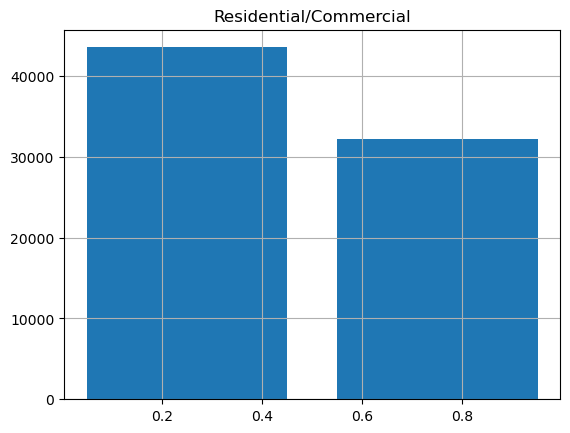

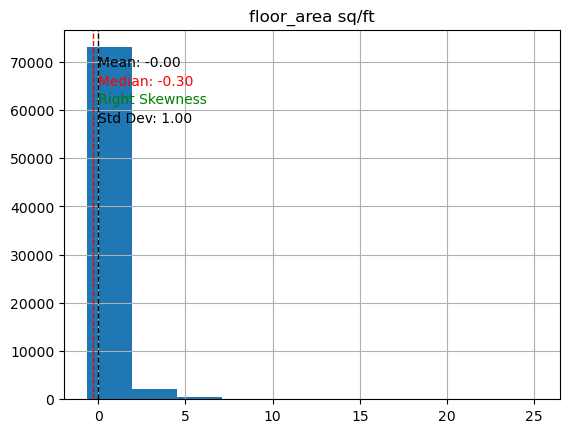

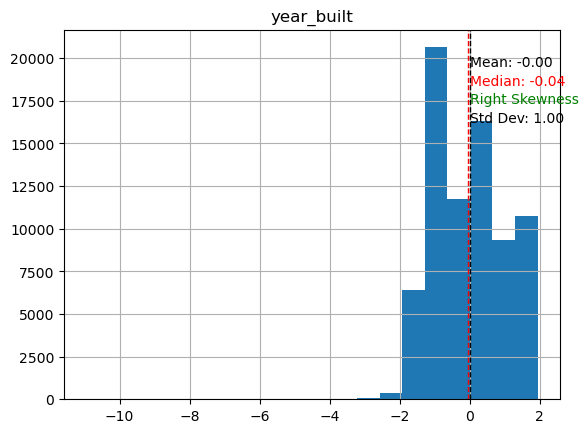

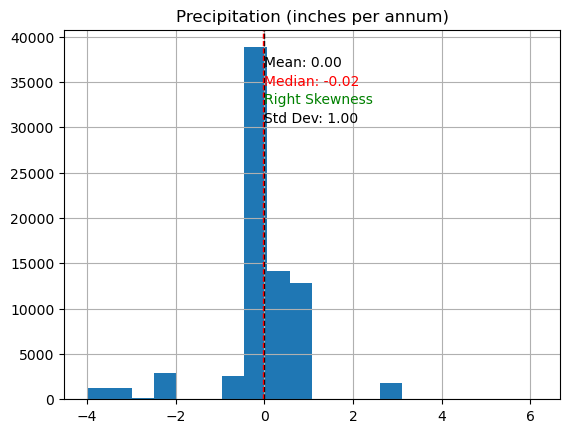

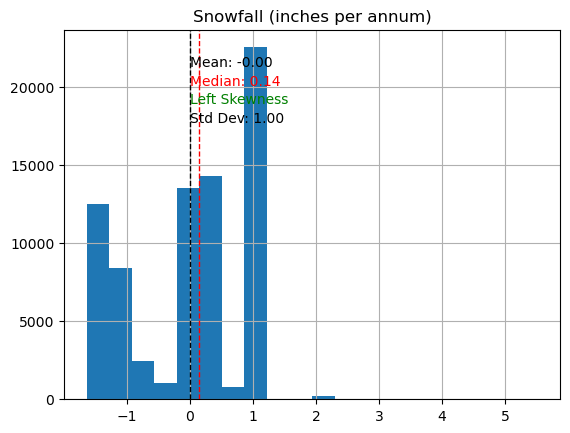

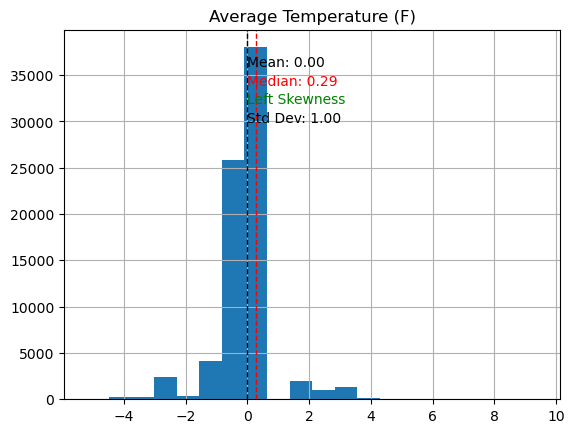

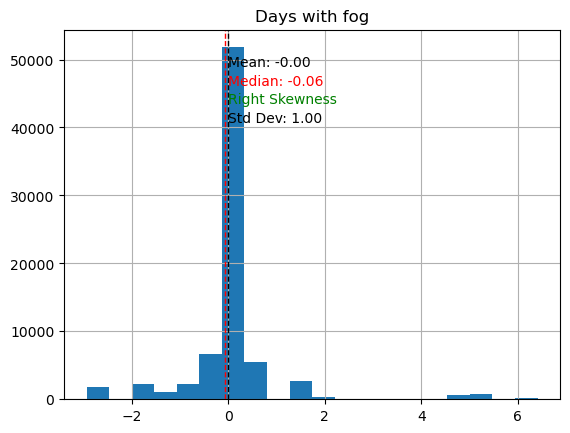

In [66]:
# import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Seaborn visualization library
import seaborn as sns# Create the default pairplot

bc=df_z_scaled["bldgClass_Commercial"]
bc.hist(bins=2,rwidth=0.8,align='mid')
plt.title('Residential/Commercial')

plt.show()

fa2=df_z_scaled["floor_area"]
fa2.hist(bins=10)
plt.axvline(fa2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fa2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fa2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(fa2.mean()))

plt.text(fa2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(fa2.median()),color='r')
if fa2.mean()== fa2.median():
    plt.text(fa2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if fa2.mean()>= fa2.median():
    plt.text(fa2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if fa2.mean()<= fa2.median():
    plt.text(fa2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(fa2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(fa2.std()))    

# Set x-axis label
plt.title('floor_area sq/ft')
plt.show()

yb2=df_z_scaled["year_built"]
yb2.hist(bins=20)
plt.axvline(yb2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(yb2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(yb2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(yb2.mean()))

plt.text(yb2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(yb2.median()),color='r')
if yb2.mean()== yb2.median():
    plt.text(yb2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if yb2.mean()>= yb2.median():
    plt.text(yb2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if yb2.mean()<= yb2.median():
    plt.text(yb2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(yb2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(yb2.std()))    

# Set x-axis label
plt.title('year_built')
plt.show()

precip2=df_z_scaled["precipitation_inches"]
precip2.hist(bins=20)
plt.axvline(precip2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(precip2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(precip2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(precip2.mean()))

plt.text(precip2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(precip2.median()),color='r')
if precip2.mean()== precip2.median():
    plt.text(precip2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if precip2.mean()>= precip2.median():
    plt.text(precip2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if precip2.mean()<= precip2.median():
    plt.text(precip2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(precip2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(precip2.std()))    

# Set x-axis label
plt.title('Precipitation (inches per annum)')
plt.show()

snow2=df_z_scaled["snowfall_inches"]
snow2.hist(bins=20)
plt.axvline(snow2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(snow2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(snow2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(snow2.mean()))

plt.text(snow2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(snow2.median()),color='r')
if snow2.mean()== snow2.median():
    plt.text(snow2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if snow2.mean()>= snow2.median():
    plt.text(snow2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if snow2.mean()<= snow2.median():
    plt.text(snow2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(snow2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(snow2.std()))    

# Set x-axis label
plt.title('Snowfall (inches per annum)')
plt.show()

temp2=df_z_scaled["avg_temp"]
temp2.hist(bins=20)
plt.axvline(temp2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(temp2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(temp2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(temp2.mean()))

plt.text(temp2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(temp2.median()),color='r')
if temp2.mean()== temp2.median():
    plt.text(temp2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if temp2.mean()>= temp2.median():
    plt.text(temp2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if temp2.mean()<= temp2.median():
    plt.text(temp2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(temp2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(temp2.std()))    

# Set x-axis label
plt.title('Average Temperature (F)')
plt.show()

fog2=df_z_scaled["days_with_fog"]
fog2.hist(bins=20)
plt.axvline(fog2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(fog2.median(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(fog2.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(fog2.mean()))

plt.text(fog2.mean()*1.1, max_ylim*0.85, 'Median: {:.2f}'.format(fog2.median()),color='r')
if fog2.mean()== fog2.median():
    plt.text(fog2.mean()*1.1, max_ylim*0.80, 'Normal Distribution',color='g')
if fog2.mean()>= fog2.median():
    plt.text(fog2.mean()*1.1, max_ylim*0.80, 'Right Skewness',color='g')
if fog2.mean()<= fog2.median():
    plt.text(fog2.mean()*1.1, max_ylim*0.80, 'Left Skewness',color='g')
plt.text(fog2.mean()*1.1, max_ylim*0.75, 'Std Dev: {:.2f}'.format(fog2.std()))    

# Set x-axis label
plt.title('Days with fog')
plt.show()

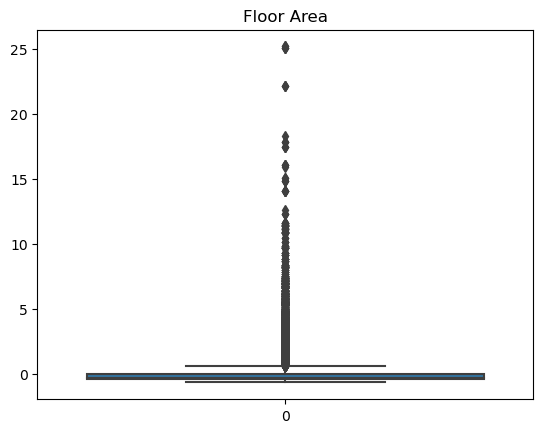

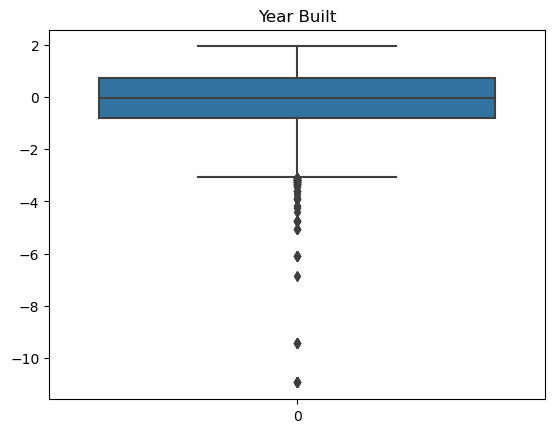

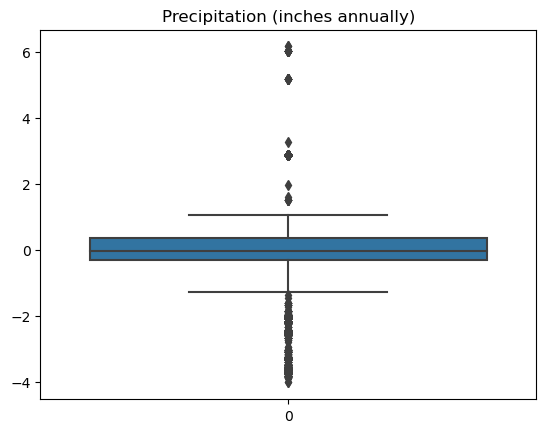

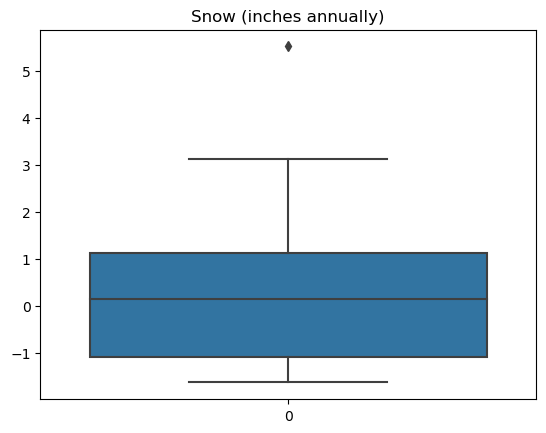

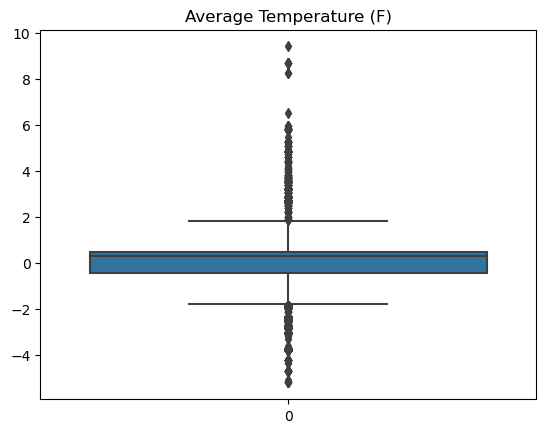

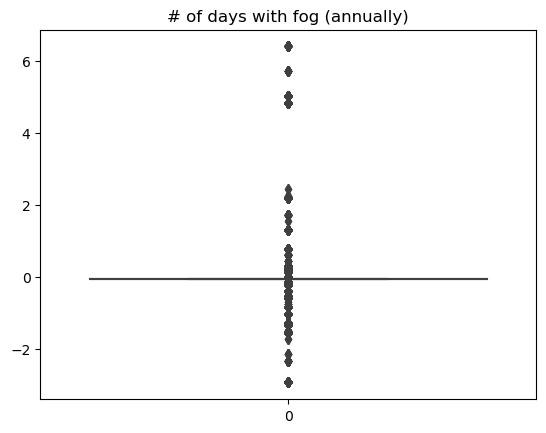

In [67]:
#show boxplot of each independent non-categorical variable
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=fa2).set_title('Floor Area')
plt.show()
#ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=yb2).set_title('Year Built')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=precip2).set_title('Precipitation (inches annually)')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=snow2).set_title('Snow (inches annually)')
plt.show()

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=temp2).set_title('Average Temperature (F)')
plt.show()


plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(data=fog2).set_title('# of days with fog (annually)')
plt.show()
